In [7]:
using DelimitedFiles, Printf
using nevanlinna_ac
using Plots

In [3]:
"""
read_GF_data(path::String[; rev::Bool=true, num::Integer = 100])
    Read Masubara Green's function data
"""
function read_GF_data(path::String)
    data = readdlm(path, skipstart = 2)
    x = map(x->convert(ComplexF64, x), data[2:end,1]) 
    y = data[2:end,2] .+ 1.0im .* data[2:end,3]
    g0 = data[1,2]
    return g0, x, y
end

read_GF_data

In [4]:
path = "/data/sliang/JuliaCMPO/XXZ/Jz_0.00_Jxy_1.00_wid_01/bondD_08_Correlation_Masubara_Freq/giwn_szsz_beta_1.00.txt"
g0, x, y = read_GF_data(path);

In [12]:
num = 20
wlist, Alist = spectral_function(Bose, x[1:num], y[1:num], g0; ωmax=2π, η=0.05)

(Double64[-6.283185307179586, -6.258052565950868, -6.232919824722149, -6.2077870834934314, -6.182654342264713, -6.157521601035994, -6.132388859807276, -6.107256118578558, -6.0821233773498395, -6.056990636121121  …  6.031857894892402, 6.056990636121121, 6.0821233773498395, 6.107256118578558, 6.132388859807276, 6.157521601035994, 6.182654342264713, 6.2077870834934314, 6.232919824722149, 6.258052565950868], Double64[-0.00021404306248122324, -0.00021685175288249368, -0.00021971082258688505, -0.0002226214291384705, -0.00022558476276514168, -0.00022860204748017423, -0.0002316745422271609, -0.00023480354207027176, -0.00023799037943190367, -0.00024123642537988478  …  0.0002445430886329101, 0.00024123642315382438, 0.00023799037730788526, 0.00023480354004310025, 0.00023167454029193122, 0.00022860204563225379, 0.0002255847610001539, 0.00022262142745227943, 0.00021971082097558102, 0.0002168517513423799])

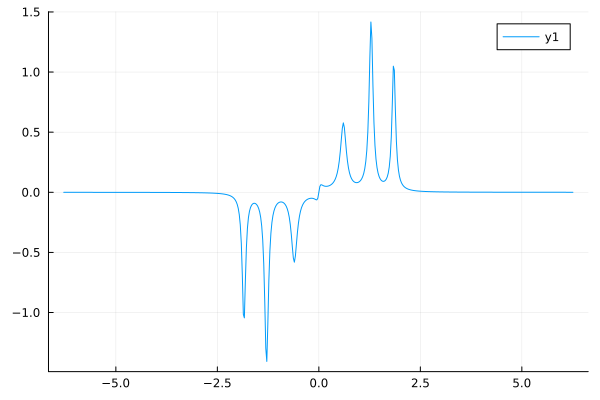

In [9]:
plot(wlist, Alist)